In [21]:
import numpy as np
import BiasVarv2 as bv
import matplotlib.pyplot as plt
import random

In [22]:
n_res = 100000
f = np.sin
x = np.linspace(-1, 1, n_res)
y = f(np.pi*x)

In [23]:
num_model = 100
num_sample = 200

In [24]:
const_weights = np.array([])
for i in range(num_model):
    x_sample = np.random.choice(x, num_sample)
    y_sample = f(np.pi*x_sample)
    const_weights = np.append(const_weights, np.mean(y_sample))

In [25]:
const_weights

array([-0.04941966, -0.07714995, -0.08188203, -0.00396838, -0.01445887,
        0.02788828,  0.03160407,  0.03861514, -0.03335748, -0.03887668,
       -0.00537493,  0.03080196,  0.00677034, -0.07955696, -0.01027266,
       -0.02158459, -0.02624271,  0.03690312, -0.01837489,  0.04901507,
       -0.02772112, -0.00164859, -0.00215438, -0.01005171,  0.00476668,
       -0.01496284, -0.00450727, -0.15541686,  0.06468289, -0.07414164,
        0.01996007, -0.0547431 , -0.05203535,  0.03859969, -0.09137182,
       -0.00762811,  0.06367354, -0.09170105,  0.04021119,  0.02658322,
        0.07436414, -0.03008157,  0.01618067,  0.04353159, -0.02730505,
        0.02364652,  0.0088676 ,  0.04559064,  0.02298368,  0.04804188,
       -0.05115914,  0.05575455,  0.05871934, -0.1393034 , -0.01689636,
       -0.07469754,  0.06140756,  0.06782483, -0.05766207,  0.00835863,
        0.05487102,  0.05791587,  0.01901512, -0.07317997,  0.01835257,
        0.03105939,  0.02027145, -0.10491951,  0.00315928, -0.02

g bar -0.00343


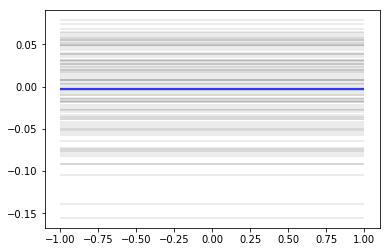

In [26]:
plt.hlines(const_weights, -1, 1, alpha=0.1)
const_gavg = np.mean(const_weights)
print('g bar', round(const_gavg, 5))
plt.hlines(const_gavg, -1, 1, color='blue')

In [27]:
const_bias = bv.cal_bias(const_gavg, y)

In [28]:
const_var = np.mean((const_weights - const_gavg)**2)

In [29]:
const_var

0.0023469525940723775

In [30]:
fi = random.sample(range(n_res), num_model)
si = random.sample(range(n_res), num_model)

In [31]:
fi == si

False

In [32]:
lin_weights = []
for i in range(num_model):
    x1 = x[fi[i]]
    y1 = y[fi[i]]
    while fi[i] == si[i]:
        # random agian if same index
        si[i] = random.randint(0, len(fi)-1)
    x2 = x[si[i]]
    y2 = y[si[i]]
    
    m = (y1 - y2)/(x1 - x2)
    c = y1 - m*x1
    model_w = [c, m]
    lin_weights.append(model_w)
lin_weights = np.array(lin_weights)

In [33]:
x_aug = np.array([[1, i] for i in x])

In [34]:
lin_res = np.array([[i.dot(x_aug.T) for i in lin_weights]])

In [35]:
lin_gavg = np.mean(lin_weights, axis=0)
lin_gavg

array([-0.01732218,  1.04518249])

In [36]:
lin_bias = bv.cal_bias(lin_gavg.dot(x_aug.T), y)

In [37]:
lin_var = bv.cal_variance(lin_res, lin_gavg.dot(x_aug.T))

In [38]:
lin_bias, lin_var

(0.19906, 1.25342)

In [39]:
const_weights

array([-0.04941966, -0.07714995, -0.08188203, -0.00396838, -0.01445887,
        0.02788828,  0.03160407,  0.03861514, -0.03335748, -0.03887668,
       -0.00537493,  0.03080196,  0.00677034, -0.07955696, -0.01027266,
       -0.02158459, -0.02624271,  0.03690312, -0.01837489,  0.04901507,
       -0.02772112, -0.00164859, -0.00215438, -0.01005171,  0.00476668,
       -0.01496284, -0.00450727, -0.15541686,  0.06468289, -0.07414164,
        0.01996007, -0.0547431 , -0.05203535,  0.03859969, -0.09137182,
       -0.00762811,  0.06367354, -0.09170105,  0.04021119,  0.02658322,
        0.07436414, -0.03008157,  0.01618067,  0.04353159, -0.02730505,
        0.02364652,  0.0088676 ,  0.04559064,  0.02298368,  0.04804188,
       -0.05115914,  0.05575455,  0.05871934, -0.1393034 , -0.01689636,
       -0.07469754,  0.06140756,  0.06782483, -0.05766207,  0.00835863,
        0.05487102,  0.05791587,  0.01901512, -0.07317997,  0.01835257,
        0.03105939,  0.02027145, -0.10491951,  0.00315928, -0.02